<a href="https://colab.research.google.com/github/neel-machine/LDA_Topic_Modelling/blob/main/LDA_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load Data

Data is in csv file , loading into a dataframe


In [ ]:
df = pd.read_csv('amazon_ring_appstore_reviews_2000.csv')
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         140 non-null    int64 
 1   userName           140 non-null    object
 2   isEdited           140 non-null    bool  
 3   date               140 non-null    object
 4   title              140 non-null    object
 5   rating             140 non-null    int64 
 6   review             140 non-null    object
 7   developerResponse  23 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 7.9+ KB


In [ ]:
pd.set_option('display.max_colwidth',None)
df.review[:5]


0                                                                                                                                                                                                                                                                                                 I have many ring products that all tie together seamlessly into this app. The video doorbell, new spotlight cam, stick up cam, and the brand new security system. My family, pets and I feel safe away on trips and feel like we have a great prevention from break ins. With the low cost of the video storage for all of our video devices I am always aware of what goes on in or around my house at all times. I feel secure and never have any issues setting up, connecting or using their devices. They all integrate wonderfully and I could not be happier. I have recommended to many friends and family members to get just a ring video doorbell. As a new mom with dogs it was hard when anytime someone rang, packages, 

# Prepare text for topic modelling

There are no null reviews,we have 140 reviews in total . Lets make the review text lowercase, remove stopwords, remove punctuations and apply lemmatisation.

In [ ]:
import nltk,re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
import string
from nltk.tokenize import word_tokenize
df.rating = df.rating.astype(str)

def clean_text(text):
  text1 = text.lower()
  text = word_tokenize(text1)
  #text = re.sub(r'[%s]' % re.escape(string.punctuation),'',text) 

  table = str.maketrans('', '', string.punctuation)
  #wrds = text.split()
  stripped = [w.translate(table) for w in text]
  final = " ".join([each for each in stripped if each.isalpha()])

  #print(text)
  return final

clean_text('that’s bought extra battery')





'that s bought extra battery'

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
df.review = df.review.apply(lambda txt:clean_text(txt))
df.review[:5]

0                                                                                                                                                                                                                                                                                                i have many ring products that all tie together seamlessly into this app the video doorbell new spotlight cam stick up cam and the brand new security system my family pets and i feel safe away on trips and feel like we have a great prevention from break ins with the low cost of the video storage for all of our video devices i am always aware of what goes on in or around my house at all times i feel secure and never have any issues setting up connecting or using their devices they all integrate wonderfully and i could not be happier i have recommended to many friends and family members to get just a ring video doorbell as a new mom with dogs it was hard when anytime someone rang packages whatever our do

In [31]:
stop_wrds = stopwords.words('english')
def remove_stopwords(txt):
  #print(txt)
  clean_txt = " ".join([wrd for wrd in txt.split() if wrd not in stop_wrds])
  return clean_txt

remove_stopwords('The city of hyderabad')


'The city hyderabad'

In [32]:
df.review = df.review.apply(lambda x:remove_stopwords(x))
df.review[1]

'ring almost worthless receiving alerts several seconds delayed settings set fast sensitive possible problem many customers complain wish would least option turning minute timer shuts live view customers decision drain battery live view bought extra battery also one times tried calling given option making appointment call back never kaitlyn ring bother paste typical reply telling email concerned read response back customers many times memorized customers realize paste cookie cutter reply addressing everyone concern ring customers really big problem connected ghz network hitting roughly dbm power engineer realize business unit marketingsales say technical staff companies technical people rarely want release product ready business side always makes happen commercials tv great product lot desired kaitlyn sure side house hope paying well'

Lets create a lemmatiser. A lemmatiser converts a word into its base form for eg ringing to ring.

In [33]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()
all = []
def lemma(txt):
  doc = nlp(txt)
  for wrd in doc:
    all.append(wrd.lemma_)

  return " ".join(all)

lemma('My phone is ringing in mornings')


'my phone be ring in morning'

In [34]:
df.review = df.review.apply(lambda x: lemma(x))
df.review[1]

'my phone be ring in morning many ring product tie together seamlessly app video doorbell new spotlight cam stick cam brand new security system family pet feel safe away trip feel like great prevention break in low cost video storage video device always aware go around house times feel secure never issue set connect use device integrate wonderfully could happier recommend many friend family member get ring video doorbell new mom dog hard anytime someone ring package whatever dog would wake baby chime set tone illicit bark aware anyone door ring doorbell motion detection amazing really easy customize get everyone hat walk want absolutely love company product every time come something new pleased well thought well integrate ring almost worthless receive alert several second delay setting set fast sensitive possible problem many customer complain wish would least option turn minute timer shut live view customer decision drain battery live view buy extra battery also one time try call give

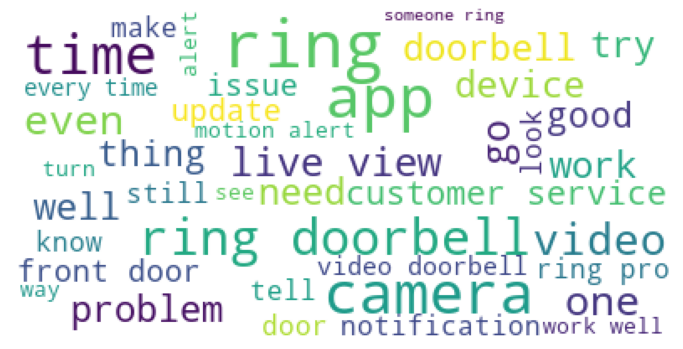

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=40,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df.review))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [36]:
import gensim
from gensim import corpora

In [38]:
reviews_all = pd.Series(df.review).apply(lambda x: x.split())
dictionary = corpora.Dictionary(reviews_all)


In [ ]:
reviews_all

In [40]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_all]


In [41]:
LDA = gensim.models.ldamodel.LdaModel


In [48]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=2, 
                random_state=100,
                passes=100)

In [49]:
lda_model.print_topics()


[(0,
  '0.026*"ring" + 0.014*"app" + 0.013*"camera" + 0.013*"get" + 0.012*"time" + 0.012*"video" + 0.011*"doorbell" + 0.010*"work" + 0.009*"motion" + 0.008*"go"'),
 (1,
  '0.025*"ring" + 0.014*"doorbell" + 0.013*"get" + 0.013*"time" + 0.013*"camera" + 0.013*"video" + 0.012*"motion" + 0.011*"app" + 0.009*"work" + 0.008*"one"')]

In [ ]:
!pip install pyldavis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

In [ ]:
LDA()

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis
